In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | los llanos de aridane
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | paita
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | kapit
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | araouane
Processing Record 14 of Set 1 | kokopo
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | nisia floresta
Processing Record 18 of Set 1 | ixtapa
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | hi

Processing Record 41 of Set 4 | da nang
Processing Record 42 of Set 4 | tambacounda
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | pundaguitan
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | honningsvag
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | vaitape
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | berdigestyakh
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 3 of Set 5 | barsovo
Processing Record 4 of Set 5 | rasht
Processing Record 5 of Set 5 | chandbali
Processing Record 6 of Set 5 | nome
Processing Record 7 of Set 5 | madimba
Processing Record 8 of Set 5 | waitati
Processing Record 9 of Set 5 | tarko-sale
Processing Record 10 of Set 5 | nago
Processing Record 11 of Set 5 | sungaipenuh
Processing Record 12 of Set 5 | antofagasta
Processing Record 13 of Set 5 | nor

Processing Record 30 of Set 8 | auki
Processing Record 31 of Set 8 | bilma
Processing Record 32 of Set 8 | khani
Processing Record 33 of Set 8 | santa vitoria do palmar
Processing Record 34 of Set 8 | waingapu
Processing Record 35 of Set 8 | marsabit
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | victor harbor
Processing Record 38 of Set 8 | kitaibaraki
Processing Record 39 of Set 8 | bowen
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | marfino
Processing Record 42 of Set 8 | lodja
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | gohana
Processing Record 45 of Set 8 | henties bay
Processing Record 46 of Set 8 | aswan
Processing Record 47 of Set 8 | kattivakkam
Processing Record 48 of Set 8 | sibolga
Processing Record 49 of Set 8 | trelew
Processing Record 50 of Set 8 | bemidji
Processing Record 1 of Set 9 | seoul
Processing Record 2 of Set 9 | dubai
Processing Record 3 of Set 9 | ijaki
City not found. Skip

Processing Record 20 of Set 12 | les cayes
Processing Record 21 of Set 12 | ha giang
Processing Record 22 of Set 12 | santa cruz
Processing Record 23 of Set 12 | ardrishaig
Processing Record 24 of Set 12 | kabanjahe
Processing Record 25 of Set 12 | thinadhoo
Processing Record 26 of Set 12 | pochutla
Processing Record 27 of Set 12 | krasnopavlivka
Processing Record 28 of Set 12 | skjervoy
Processing Record 29 of Set 12 | kargopol
Processing Record 30 of Set 12 | sobolevo
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | alcudia
Processing Record 33 of Set 12 | fujin
Processing Record 34 of Set 12 | villa carlos paz
Processing Record 35 of Set 12 | syracuse
Processing Record 36 of Set 12 | waslala
Processing Record 37 of Set 12 | sao felix do xingu
Processing Record 38 of Set 12 | conneaut
Processing Record 39 of Set 12 | huanren
Processing Record 40 of Set 12 | aras
Processing Record 41 of Set 12 | uyuni
Processing Record 42 of Set 12 | karuzi
Processing Record 43

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,71.89,88,20,1.14,MU,2022-06-06 22:33:07
1,Dikson,73.5069,80.5464,30.18,96,100,11.30,RU,2022-06-06 22:33:08
2,Vaini,-21.2000,-175.2000,77.16,65,20,11.50,TO,2022-06-06 22:33:01
3,Mar Del Plata,-38.0023,-57.5575,59.09,67,0,11.50,AR,2022-06-06 22:38:39
4,Cherskiy,68.7500,161.3000,43.20,48,47,9.26,RU,2022-06-06 22:40:13
5,Bredasdorp,-34.5322,20.0403,59.32,37,22,3.51,ZA,2022-06-06 22:34:35
6,Los Llanos De Aridane,28.6585,-17.9182,65.95,89,100,20.71,ES,2022-06-06 22:41:45
7,Atuona,-9.8000,-139.0333,78.15,73,15,13.85,PF,2022-06-06 22:37:08
8,Paita,-5.0892,-81.1144,66.31,78,3,16.78,PE,2022-06-06 22:41:46
9,East London,-33.0153,27.9116,65.12,40,0,5.79,ZA,2022-06-06 22:34:29


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-06-06 22:33:07,-20.4081,57.7000,71.89,88,20,1.14
1,Dikson,RU,2022-06-06 22:33:08,73.5069,80.5464,30.18,96,100,11.30
2,Vaini,TO,2022-06-06 22:33:01,-21.2000,-175.2000,77.16,65,20,11.50
3,Mar Del Plata,AR,2022-06-06 22:38:39,-38.0023,-57.5575,59.09,67,0,11.50
4,Cherskiy,RU,2022-06-06 22:40:13,68.7500,161.3000,43.20,48,47,9.26
...,...,...,...,...,...,...,...,...,...
566,Kapoeta,SS,2022-06-06 23:11:14,4.7717,33.5903,79.84,47,100,4.68
567,Fare,PF,2022-06-06 23:11:15,-16.7000,-151.0167,80.40,73,4,18.88
568,Briceno,CO,2022-06-06 23:11:15,7.1110,-75.5515,68.67,98,90,1.88
569,Vangaindrano,MG,2022-06-06 23:11:15,-23.3500,47.6000,67.87,86,100,4.03


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

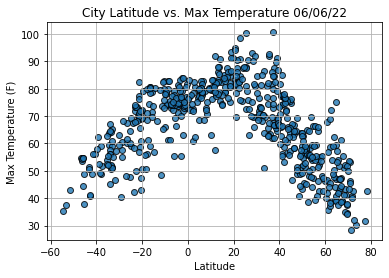

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

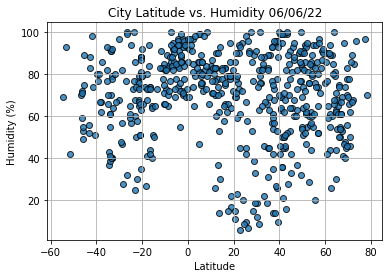

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

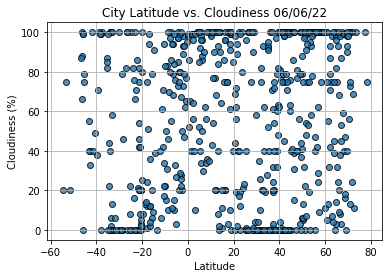

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

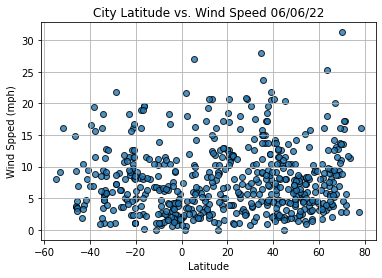

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Spped (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()